# Importing our needed Libraries and Dataframes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
#our 3 dataframes
title_basics = pd.read_csv('Data/title.basics.csv')
bom = pd.read_csv('Data/bom.movie_gross.csv')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')

# Defining some of the functions we need

In [3]:
def to_float_only(entry):
    '''Turns a number in string format
    $123,456 to a float.
    
    Parameters:
    entry -- the string we want to change
    '''
    entry = entry.replace('$', '').replace(',', '')
    return float(entry)

Given a dataframe, I want to find the cumulative gross per years.
This will be used when we are trying to find the cumulative gross
per year for each genre.

In [4]:
def gross_per_year(df):
    '''Return a dictionary of cumulitive gross per years.
    
    Parameters:
    df -- Dataframe
    '''
    #make empty dictionary to store our key:value pairs
    gross_info = {}
    #get the years for each genre
    years = sorted(list(df.year.unique()))
    for year in years:
        #only get the information relevant to our year
        year_group = df[df['year']==year]
        #get total gross
        total = sum(year_group.domestic_gross) + sum(year_group.foreign_gross)
        #make our year and its total gross as a key:value pair
        gross_info[str(year)] = total
    return gross_info

We will use this to get the top 5 grossing studios per genre later.

In [5]:
def top5_studios_in_genre(df):
    '''
    Get a dictionary of the 5 studios with the highest gross amounts
    
    Parameteres:
    df -- Dataframe
    '''
    #make empty dictionary to store our key:value pairs
    studio_info = {}
    #get our unique studios
    studios = list(df.studio.unique())
    for studio in studios:
        #only get the information relevant to our studio
        studio_group = df[df['studio']==studio]
        #get the studio's total gross
        total=sum(studio_group.domestic_gross) + sum(studio_group.foreign_gross)
        #make our studio and its total gross as a key:value pair
        studio_info[studio]=total
    #sort our studios and get the top 5
    sorted_studios = {s: g for s, g in sorted(studio_info.items(), 
                                              key=lambda item: item[1],
                                              reverse=True)}
    top5 = dict(itertools.islice(sorted_studios.items(),
                                 5))
    return top5

# Data Merging and Cleaning

merging our dataframes to get the genres related to our movie

In [6]:
new_df = bom.merge(title_basics, how='inner', left_on='title', right_on='primary_title')
new_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


Cleaning our data to drop missing information
and to convert our values to the correct format.

In [7]:
new_df.dropna(subset=['genres', 'domestic_gross','foreign_gross'],inplace=True)
def to_float_only(entry):
    entry = entry.replace('$', '').replace(',', '')
    return float(entry)

new_df['foreign_gross'] = [to_float_only(c) for c in new_df.foreign_gross]

creating a dataframe that gives us our production,
domestic, and worldwide gross so we can calculate
income later.

In [8]:
income_df = new_df.merge(tn_movie_budgets, how='inner', left_on='title', right_on='movie')
income_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


Cleaning up to drop missing information and convert to the correct format.

In [9]:
income_df.dropna(subset=['production_budget', 'worldwide_gross'],inplace=True)
income_df['production_budget'] = [to_float_only(pb) for pb in income_df.production_budget]
income_df['worldwide_gross'] = [to_float_only(wg) for wg in income_df.worldwide_gross]
income_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000.0,"$292,576,195",8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,"$300,531,751",7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000.0,"$312,433,331",6.211564e+08


title_basics has more elements with their involved genres.
It would be best to get our total genre count from this database.

In [10]:
title_basics.dropna(subset=['genres'],inplace=True)

# Getting Top Genres

In [11]:
'''
Empty dictionary to store our key:value pairs
for each genre and its count.
'''
genre_counts = {}
for genrelist in title_basics['genres']:
    '''
    Since genres are given in an a,b,c format,
    we will separate the genres in each entry 
    and get the total count from there.
    '''
    genrelist = genrelist.split(',')
    for genre in genrelist:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [12]:
#sort our genres in descending order
sorted_genres = dict(sorted(genre_counts.items(),
                            key=lambda x: x[1],
                            reverse=True))

In [13]:
#get our top 10genres
top10 = dict(itertools.islice(sorted_genres.items(), 10)) 
top10genres = list(top10.keys())

For our top 10 genres, we want to get the total gross information
for each year for each genre.


In [14]:
genre_gross_info = {}
for genre in top10genres:
    genre_df = new_df[new_df['genres'].str.contains(genre)]
    genre_gross_info[str(genre)] = gross_per_year(genre_df)

For our top 10 genres, we want to get the total gross information
overall for each genre.

In [15]:
genre_total_gross_info = {}
for genre in genre_gross_info:
    genre_total_gross_info[genre] = sum(genre_gross_info[genre].values())

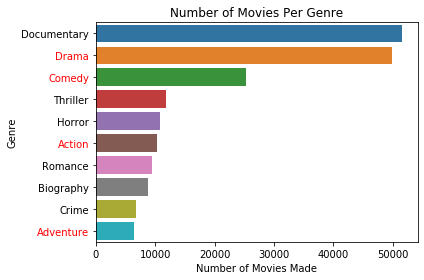

In [16]:
#plot our top 10 genres
genrex = list(top10.values())
genrey = list(top10.keys())
sns.barplot(genrex, genrey)
plt.ylabel('Genre')
plt.xlabel('Number of Movies Made')
plt.title('Number of Movies Per Genre')
plt.tight_layout()
'''
After getting each genres gross info,
I highlighted our top 4 genres.
'''
plt.gca().get_yticklabels()[1].set_color("red")
plt.gca().get_yticklabels()[2].set_color("red")
plt.gca().get_yticklabels()[5].set_color("red")
plt.gca().get_yticklabels()[9].set_color("red")
#save our figure
plt.savefig('images/top10genres.png')
plt.show()

In [17]:
top10genres

['Documentary',
 'Drama',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Biography',
 'Crime',
 'Adventure']

# Getting Genre Gross Information

I got the total gross info for our top 4 genres
in the last 2 decades. This would help us see how they
are doing fairly recently.

In [18]:
top4genres = ['Adventure','Action','Comedy', 'Drama']
genre_decade_grossings = { 'Adventure': 0, 'Action':0, 'Comedy': 0, 'Drama': 0}
for genre in top4genres:
    for year in genre_gross_info[genre]:
        if int(year)>1999 and int(year)<2018:
            genre_decade_grossings[genre] += genre_gross_info[genre][year]

Plotting the top 4 genres total grossing to see
how they do compared to one another.

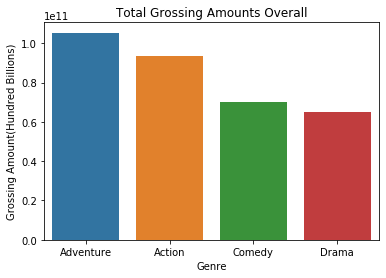

In [19]:
sns.barplot(list(genre_decade_grossings.keys()),
            list(genre_decade_grossings.values()))
plt.title('Total Grossing Amounts Overall')
plt.xlabel('Genre')
plt.ylabel('Grossing Amount(Hundred Billions)')
plt.savefig('images/top4_genre_gross.png')
plt.show()

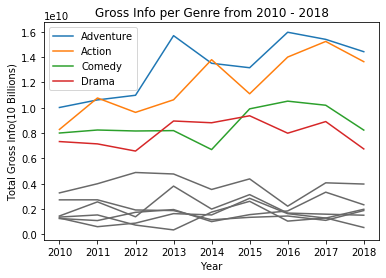

In [20]:
#Isolating our other 6 genres.
genres6 = ['Documentary', 'Thriller', 'Horror', 'Romance', 'Biography', 'Crime']

#plotting our top 4 genres first with color
for genre in top4genres:
    genre_info = genre_gross_info[genre]
    plt.plot(list(genre_info.keys()), list(genre_info.values()))
    plt.legend(top4genres)
    
'''
Plotting our other 6 genres with a gray color.
This will help us distinguish the difference in
how well the genres are doing.
'''
for genre in genres6:
    genre_info = genre_gross_info[genre]
    plt.plot(list(genre_info.keys()), list(genre_info.values()), color = 'dimgray')

plt.xlabel('Year')
plt.ylabel('Total Gross Info(10 Billions)')
plt.title('Gross Info per Genre from 2010 - 2018')
plt.savefig('images/genre_gross_comparisons.png')
plt.show()

# Getting Top 5 Studios for our 4 Genres

I am making a dataframe for our top 4 genres.
This is so we can get the total grossing amounts
for each genre. This will also let us customize our
graphs for each genre when we plot them.

In [21]:
adventure_df = new_df[new_df['genres'].str.contains('Adventure')]
comedy_df = new_df[new_df['genres'].str.contains('Comedy')] 
action_df = new_df[new_df['genres'].str.contains('Action')]
drama_df = new_df[new_df['genres'].str.contains('Drama')]

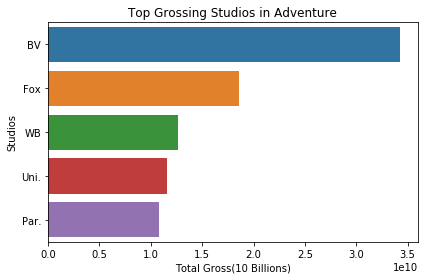

{'BV': 34259001369.5, 'Fox': 18549488998.0, 'WB': 12677126000.0, 'Uni.': 11600750019.4, 'Par.': 10764906698.0}


In [22]:
#get the top 5 studios, plot them, and save our figure.
adventure = top5_studios_in_genre(adventure_df)
adventurex = list(adventure.values())
adventurey = list(adventure.keys())
plt.title('Top Grossing Studios in Adventure')
sns.barplot(adventurex, adventurey)
plt.xlabel('Total Gross(10 Billions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('images/adventure.png')
plt.show()
print(adventure)

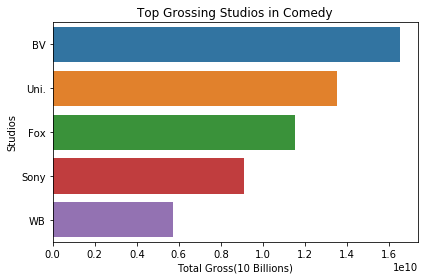

{'BV': 16538500000.0, 'Uni.': 13541519000.0, 'Fox': 11534176997.0, 'Sony': 9120435997.0, 'WB': 5722352000.0}


In [23]:
#get the top 5 studios, plot them, and save our figure.
comedy = top5_studios_in_genre(comedy_df)
comedyx = list(comedy.values())
comedyy = list(comedy.keys())
plt.title('Top Grossing Studios in Comedy')
sns.barplot(comedyx, comedyy)
plt.xlabel('Total Gross(10 Billions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('images/comedy.png')
plt.show()
print(comedy)

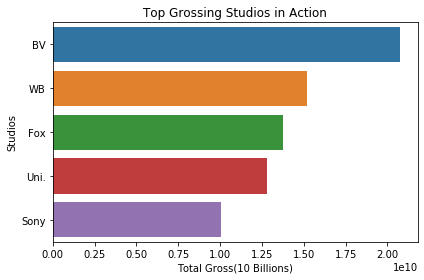

{'BV': 20760401369.5, 'WB': 15199555999.0, 'Fox': 13741389000.0, 'Uni.': 12786200191.4, 'Sony': 10069513499.0}


In [24]:
#get the top 5 studios, plot them, and save our figure.
action = top5_studios_in_genre(action_df)
actionx = list(action.values())
actiony = list(action.keys())
plt.title('Top Grossing Studios in Action')
sns.barplot(actionx, actiony)
plt.xlabel('Total Gross(10 Billions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('images/action.png')
plt.show()
print(action)

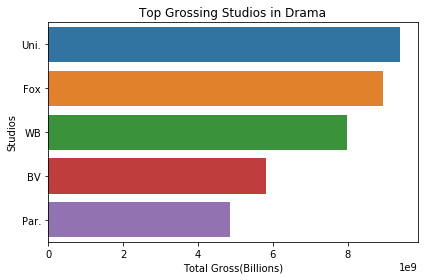

{'Uni.': 9394947000.0, 'Fox': 8941222600.0, 'WB': 7967376999.0, 'BV': 5819137000.0, 'Par.': 4851612698.0}


In [25]:
#get the top 5 studios, plot them, and save our figure.
drama = top5_studios_in_genre(drama_df)
dramax = list(drama.values())
dramay = list(drama.keys())
plt.title('Top Grossing Studios in Drama')
sns.barplot(dramax, dramay)
plt.xlabel('Total Gross(Billions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('images/drama.png')
plt.show()
print(drama)

# Getting our Top Studios and their Yearly Domestic/Foreign Average Income

In [26]:
#all the studios we need to consider
top_studios = ['BV', 'Uni.', 'Fox', 'Sony', 'WB', 'Par.']

For each studio, we want to get the profit they made
from our available information. This will go through
each studio, get their numbers for each year, and then
put all this information into a dictionary.

In [27]:
#empty dictionary
top_studios_info = {}
for studio in top_studios:
    #get the relevant information to our studio
    df = income_df[income_df['studio'] == studio]
    #get the unique years we can get information from
    years = (income_df.start_year.unique())
    #empty dictionary to store our domestic and foreign profits
    profit_info = {}
    for year in years:
        #get the relevant information for the year
        year_df = df[df['start_year']==year]
        #calculate domestic and foreign profits
        domestic_profit = sum(year_df.domestic_gross_x) - sum(year_df.production_budget)
        foreign_profit = sum(year_df.foreign_gross) - sum(year_df.production_budget)
        #make year and profits a key:value pair
        profit_info[str(year)] = {'domestic':domestic_profit,'foreign':foreign_profit}
    top_studios_info[str(studio)] = profit_info

I decided to get the domestic and foreign profit averages
for each studio. This will show us the average yearly domestic and
foreign profit for each studio.

In [28]:
#setting both averages as different dictionaries
domestic_averages = {}
foreign_averages = {}

for s in top_studios_info:
    #keep track of total and the number of years to divide by
    domestic_total = 0
    foreign_total = 0
    n = len(top_studios_info[s])
    #get the total and then divide by n to get the average
    for y in top_studios_info[s].keys():
        #year specific information
        needed = top_studios_info[s][y]
        domestic_total += needed['domestic']
        foreign_total += needed['foreign']
        domestic_average = domestic_total/n
        foreign_average = foreign_total/n
    #make each studio and average a key:value pair
    domestic_averages[s] = domestic_average
    foreign_averages[s] = foreign_average

We will get the domestic and foreign averages now.

In [29]:
#sort our domestic averages in descending order and print
sorted_domestic_averages = {studio: avg for studio, avg in sorted(domestic_averages.items(), 
                                                    key=lambda item: item[1],
                                                    reverse=True)}

In [30]:
sorted_domestic_averages

{'Uni.': 617217600.0,
 'BV': 523600000.0,
 'Sony': 184069999.8,
 'WB': 183160000.0,
 'Fox': 161329999.8,
 'Par.': 155339999.9}

In [31]:
#sort our domestic averages in descending order and print
sorted_foreign_averages = {studio: avg for studio, avg in sorted(foreign_averages.items(), 
                                                   key=lambda item: item[1],
                                                   reverse=True)}

In [32]:
sorted_foreign_averages

{'BV': 1335123836.95,
 'Uni.': 980327119.14,
 'Fox': 976453359.9,
 'Sony': 596299999.9,
 'WB': 565080299.6,
 'Par.': 402686699.7}